Задание 1

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [19]:
y = np.array([12.19, 8.41, 14.68, 8.64, 32.94, 22.61, 45.92, 23.63, 18.59, 36.22, 50.10, 46.22, 23.63, 47.30, 40.03, 56.53, 38.41, 51.47, 6.29, 35.41, 67.79, 74.21, 79.12, 45.10])
x = np.linspace(0, 1, num = 24)

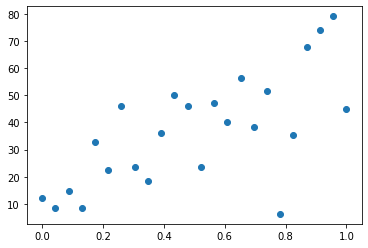

In [20]:
plt.scatter(x, y);

In [21]:
a=[]
for i in x:
  a.append(math.exp(i))
print(a)

[1.0, 1.0444372889067748, 1.0908492504589336, 1.1393236337553159, 1.189952087226817, 1.2428303319121348, 1.298058342433417, 1.3557405360139798, 1.4159859698954587, 1.4789085475276427, 1.544627233920827, 1.613266280567839, 1.68495546036099, 1.7598303129480988, 1.8380324009914732, 1.919709577814344, 2.0050162669407823, 2.094113754057613, 2.1871704919503214, 2.2843624189894904, 2.3858732917699053, 2.491895032531242, 2.6026280920171896, 2.718281828459045]


In [22]:
B = list(zip(np.ones(24), x))
X = list(zip(np.ones(24), x, x*x))
Y = list(zip(np.ones(24), x, x*x, x*x*x))
Z = list(zip(np.ones(24), a))

In [23]:
K = np.linalg.lstsq(B, y, rcond=None)[0]
print(K)
W = np.linalg.lstsq(X, y, rcond=None)[0]
print(W)
V = np.linalg.lstsq(Y, y, rcond=None)[0]
print(V)
U = np.linalg.lstsq(Z, y, rcond=None)[0]
print(U)

[13.63803333 46.5106    ]
[12.1867     55.61441818 -9.10381818]
[   5.65033333  143.52996465 -233.63225758  149.68562626]
[-9.42279902 26.85911292]


In [24]:
def f(x, w): 
    return w[0] + w[1]*x + w[2]*x*x
print(f(x, W))
def f2(x, v): 
    return v[0] + v[1]*x + v[2]*x*x + v[3]*x*x*x
print(f2(x, V))
def f3(x, u): 
    return u[0] + u[1]*x
print(f3(np.array(a), U))
print(f3(x, K))

[12.1867     14.5875087  16.95389842 19.28586917 21.58342095 23.84655375
 26.07526759 28.26956245 30.42943834 32.55489526 34.6459332  36.70255217
 38.72475217 40.7125332  42.66589526 44.58483834 46.46936245 48.31946759
 50.13515375 51.91642095 53.66326917 55.37569842 57.0537087  58.6973    ]
[ 5.65033333 11.46142029 16.46302503 20.72896311 24.33305007 27.34910145
 29.85093281 31.91235968 33.60719763 35.00926219 36.19236891 37.23033333
 38.19697101 39.1660975  40.21152833 41.40707905 42.82656522 44.54380237
 46.63260606 49.16679183 52.22017523 55.86657181 60.1797971  65.23366667]
[17.43631391 18.62986007 19.87644418 21.17842312 22.53825847 23.95852121
 25.44189658 26.99118913 28.60932804 30.29937266 32.06451828 33.90810219
 35.83360996 37.84468208 39.9451208  42.13889731 44.43015931 46.82323878
 49.32266021 51.93314915 54.65964115 57.50729105 60.4814828  63.58783957]
[13.63803333 15.66023333 17.68243333 19.70463333 21.72683333 23.74903333
 25.77123333 27.79343333 29.81563333 31.83783333

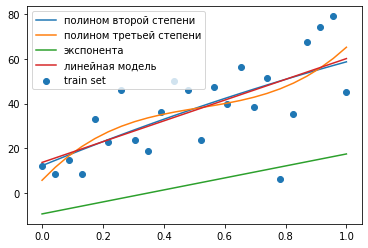

In [25]:
plt.scatter(x, y, label='train set')
plt.plot(x, f(x, W), label='полином второй степени')
plt.legend();
plt.plot(x, f2(x, V), label='полином третьей степени')
plt.legend();
plt.plot(x, f3(x, U), label='экспонента')
plt.legend();
plt.plot(x, f3(x, K), label='линейная модель')
plt.legend();

In [26]:
from sklearn.metrics import mean_squared_error
print ('Для полинома второй степени')
mean_squared_error(y, f(x, W))

Для полинома второй степени


212.59353678557315

In [27]:
print ('Для полинома третьей степени')
mean_squared_error(y, f2(x, V))

Для полинома третьей степени


202.513036590909

In [28]:
print ('Для экспоненты')
mean_squared_error(y, f3(x, U))

Для экспоненты


1329.6417303705573

In [29]:
print ('Для линейной модели')
mean_squared_error(y, f3(x, K))

Для линейной модели


213.13469863888886

По результата MSE наилучший вариант показывает модель линейной регрессии полинома третьей степени



Задание 2

In [30]:
from sklearn import datasets, linear_model
import pandas as pd
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

Для 1 признака:
MSE for LinearRegression: 4424.14
MSE for Ridge 0.1: 4410.59
MSE for Ridge 0.5: 4405.35
MSE for Ridge 0.9: 4418.36
MSE for Lasso 0.1: 4408.42
MSE for Lasso 0.5: 4445.58
MSE for Lasso 0.9: 4533.17
MSE for ElasticNet 0.1: 4519.10
MSE for ElasticNet 0.5: 4531.08
MSE for ElasticNet 0.9: 4532.50
__________________

Для 2 признака:
MSE for LinearRegression: 4504.62
MSE for Ridge 0.1: 4507.29
MSE for Ridge 0.5: 4514.39
MSE for Ridge 0.9: 4518.46
MSE for Lasso 0.1: 4530.59
MSE for Lasso 0.5: 4533.17
MSE for Lasso 0.9: 4533.17
MSE for ElasticNet 0.1: 4532.39
MSE for ElasticNet 0.5: 4533.17
MSE for ElasticNet 0.9: 4533.17
__________________

Для 3 признака:
MSE for LinearRegression: 3656.42
MSE for Ridge 0.1: 3542.57
MSE for Ridge 0.5: 3483.64
MSE for Ridge 0.9: 3581.68
MSE for Lasso 0.1: 3605.33
MSE for Lasso 0.5: 3481.58
MSE for Lasso 0.9: 3486.84
MSE for ElasticNet 0.1: 4407.09
MSE for ElasticNet 0.5: 4508.74
MSE for ElasticNet 0.9: 4520.83
__________________

Для 4 признака:


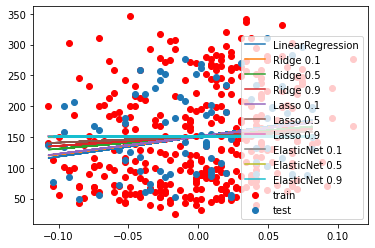

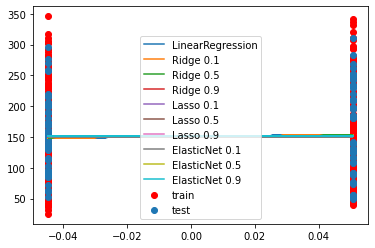

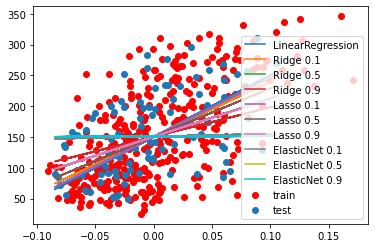

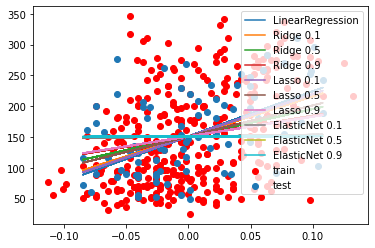

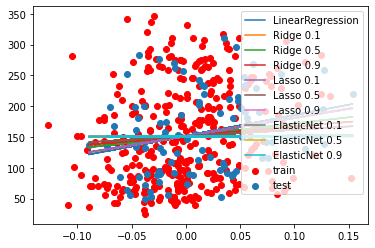

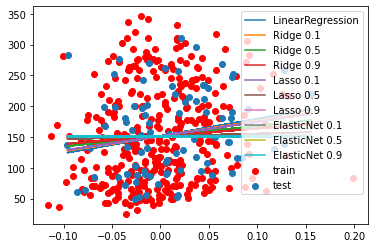

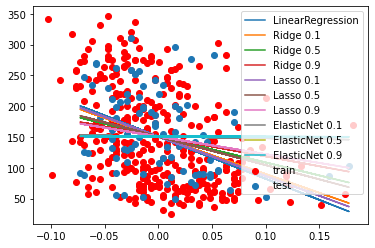

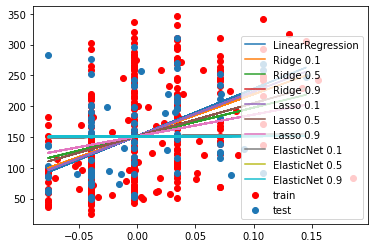

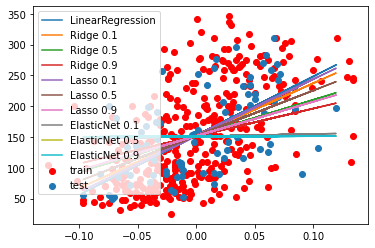

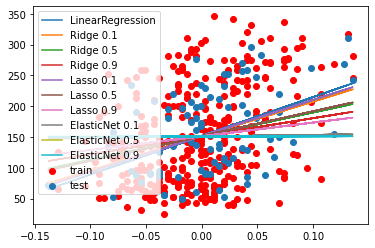

In [74]:
from sklearn.model_selection import train_test_split
import random
for i in range(10):
  print ('Для ' + str(i+1) + ' признака:')
  plt.figure(i)
  diabetes_X = diabetes_X[:, np.newaxis, i]
  diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state=27)
  
  #LinearRegression
  lr = linear_model.LinearRegression()
  lr.fit(diabetes_X_train, diabetes_y_train)
  diabetes_y_pred_lr = lr.predict(diabetes_X_test)
  print('MSE for LinearRegression: %.2f'
        % mean_squared_error(diabetes_y_test, diabetes_y_pred_lr))
  plt.plot(diabetes_X_test, diabetes_y_pred_lr, label='LinearRegression')
  
  #Ridge
  g = [0.1, 0.5, 0.9]
  for j in g:
    ridge = linear_model.Ridge(alpha=j)
    ridge.fit(diabetes_X_train, diabetes_y_train)
    diabetes_y_pred_r = ridge.predict(diabetes_X_test)
    print('MSE for Ridge '+ str(j) + ': %.2f'
          % mean_squared_error(diabetes_y_test, diabetes_y_pred_r))
    plt.plot(diabetes_X_test, diabetes_y_pred_r, label='Ridge '+ str(j))

  #Lasso
  h = [0.1, 0.5, 0.9]
  for k in h:
    lasso = linear_model.Lasso(alpha=k)
    lasso.fit(diabetes_X_train, diabetes_y_train)
    diabetes_y_pred_r = lasso.predict(diabetes_X_test)
    print('MSE for Lasso '+ str(k) + ': %.2f'
          % mean_squared_error(diabetes_y_test, diabetes_y_pred_r))
    plt.plot(diabetes_X_test, diabetes_y_pred_r, label='Lasso '+ str(k))
  
  #ElasticNet
  h = [0.1, 0.5, 0.9]
  for l in h:
    en = linear_model.ElasticNet(alpha=l)
    en.fit(diabetes_X_train, diabetes_y_train)
    diabetes_y_pred_r = en.predict(diabetes_X_test)
    print('MSE for ElasticNet '+ str(l) + ': %.2f'
          % mean_squared_error(diabetes_y_test, diabetes_y_pred_r))
    plt.plot(diabetes_X_test, diabetes_y_pred_r, label='ElasticNet '+ str(l))

  plt.scatter(diabetes_X_train, diabetes_y_train, label='train', c='red')
  plt.scatter(diabetes_X_test, diabetes_y_test, label='test')
  plt.legend()
  diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
  print ('__________________\n')

Наилучшие модели по результатам MSE по признакам:

1. Ridge 0.3
2. LinearRegression
3. Ridge 0.3
4. Ridge 0.1
5. LinearRegression
6. LinearRegression
7. Lasso 0.5
8. Ridge 0.5
9. Lasso 0.5
10. Lasso 0.1

